# Gender Bias in Taylor Swift Songs

I will Analyze gender bias in the lyrics column and group the results by each different album

### Methodology
the gender bias analysis in song lyrics is done using NLP tools .

In [84]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv('cleaned_lyrics_dataset.csv')  

# Lists of terms
male_terms = [
    'he', 'him', 'his', 'himself',
    'boy', 'boyfriend', 'husband', 'father', 'son', 'uncle', 'nephew', 'brother',
    'man', 'men', 'male', 'gentleman', 'gentlemen', 'sir', 'mr', 'mister', 'king', 'prince', 'lord'
]
female_terms = [
    'she', 'her', 'hers', 'herself',
    'girl', 'girlfriend', 'wife', 'mother', 'daughter', 'aunt', 'niece', 'sister',
    'woman', 'women', 'female', 'lady', 'ladies', 'miss', 'ms', 'mrs', 'queen', 'princess', 'madam'
]
neutral_pronouns = ['they', 'them', 'theirs', 'themselves']

compiled_patterns = {
    'male_terms': [re.compile(r'\b' + term + r'\b', flags=re.IGNORECASE) for term in male_terms],
    'female_terms': [re.compile(r'\b' + term + r'\b', flags=re.IGNORECASE) for term in female_terms],
    'neutral_pronouns': [re.compile(r'\b' + term + r'\b', flags=re.IGNORECASE) for term in neutral_pronouns]
}

def count_terms(text, pattern_list):
    """Count occurrences of compiled regex patterns in text."""
    if not isinstance(text, str):
        return 0
    return sum(len(pattern.findall(text)) for pattern in pattern_list)

for term_type, patterns in compiled_patterns.items():
    df[term_type] = df['lyric'].apply(count_terms, pattern_list=patterns)

# Group by album and sum
album_stats = df.groupby('album_name').agg({
    'male_terms': 'sum',
    'female_terms': 'sum',
    'neutral_pronouns': 'sum'
}).reset_index()

album_stats['total_terms'] = album_stats['male_terms'] + album_stats['female_terms'] + album_stats['neutral_pronouns']


# Recalculating normalized term counts to reflect percentages
album_stats['male_terms_pct'] = (album_stats['male_terms'] / album_stats['total_terms']) * 100
album_stats['female_terms_pct'] = (album_stats['female_terms'] / album_stats['total_terms']) * 100
album_stats['neutral_pronouns_pct'] = (album_stats['neutral_pronouns'] / album_stats['total_terms']) * 100

album_stats['male_terms_pct'] = album_stats['male_terms_pct'].apply(lambda x: f"{x:.2f}")
album_stats['female_terms_pct'] = album_stats['female_terms_pct'].apply(lambda x: f"{x:.2f}")
album_stats['neutral_pronouns_pct'] = album_stats['neutral_pronouns_pct'].apply(lambda x: f"{x:.2f}")


album_stats[['album_name', 'male_terms_pct', 'female_terms_pct', 'neutral_pronouns_pct', ]]


output_filename = 'album_gender_bias_stats.csv'
album_stats.to_csv(output_filename, index=False)
album_stats


,album_name,male_terms,female_terms,neutral_pronouns,total_terms,male_terms_pct,female_terms_pct,neutral_pronouns_pct
0,1989 (Deluxe),24,37,32,93,25.81,39.78,34.41
1,Fearless (Taylor’s Version),70,37,15,122,57.38,30.33,12.30
2,Lover,83,15,29,127,65.35,11.81,22.83
3,Red (Deluxe Edition),61,30,19,110,55.45,27.27,17.27
4,Speak Now (Deluxe),22,49,30,101,21.78,48.51,29.70
5,Taylor Swift,48,25,4,77,62.34,32.47,5.19
6,evermore (deluxe version),52,27,18,97,53.61,27.84,18.56
7,folklore (deluxe version),12,50,24,86,13.95,58.14,27.91
8,reputation,55,14,52,121,45.45,11.57,42.98


# Visualisation of the result 

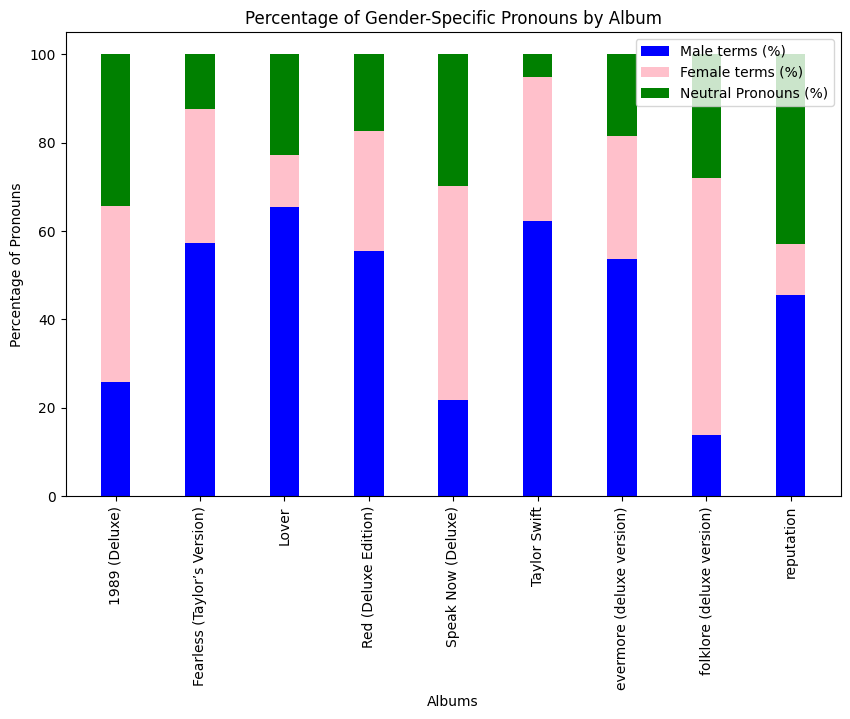

In [80]:
import matplotlib.pyplot as plt

# Assuming album_stats DataFrame is already prepared with the percentage columns.

fig, ax = plt.subplots(figsize=(10, 8))
ind = range(len(album_stats))  # Use the length of album_stats
width = 0.35       

# Plotting
p1 = ax.bar(ind, album_stats['male_terms_pct'], width, color='blue', label='Male terms (%)')
p2 = ax.bar(ind, album_stats['female_terms_pct'], width, bottom=album_stats['male_terms_pct'], color='pink', label='Female terms (%)')
p3 = ax.bar(ind, album_stats['neutral_pronouns_pct'], width, bottom=album_stats['male_terms_pct'] + album_stats['female_terms_pct'], color='green', label='Neutral Pronouns (%)')

ax.set_xlabel('Albums')
ax.set_ylabel('Percentage of Pronouns')
ax.set_title('Percentage of Gender-Specific Pronouns by Album')
ax.set_xticks(ind)
ax.set_xticklabels(album_stats['album_name'], rotation=90)  
ax.legend()

plt.subplots_adjust(bottom=0.3)  
plt.show()
